In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base_path = "/content/drive/MyDrive/MRP_Offensive_Content_Detection/Final_Dataset/"
dataset_name = "mrp_final_dataset.csv"
df = pd.read_csv(base_path + dataset_name)

In [ ]:
df.shape

(6463, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['majority_label'])  # Maps labels to integers

In [ ]:
df['label'].value_counts()

,count
label,
1,3584
0,2879


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import TweetTokenizer
import torch
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import torch

In [ ]:
# 80% for training/validation, 20% final test
train_eval_df, final_test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

# Split the 80%: 10% of it (8% total) for eval
train_df, eval_df = train_test_split(
    train_eval_df,
    test_size=0.1,
    random_state=42,
    stratify=train_eval_df['label']
)

print("Train size:", len(train_df))
print("Eval size:", len(eval_df))
print("Final test size:", len(final_test_df))

Train size: 4653
Eval size: 517
Final test size: 1293


In [ ]:
final_test_df.to_csv('final_test_df.csv', index=False)

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
final_test_dataset = Dataset.from_pandas(final_test_df)

# Hyper Parameter Fine Tuning using Grid Search


Map:   0%|          | 0/4653 [00:00<?, ? examples/s]

Map:   0%|          | 0/517 [00:00<?, ? examples/s]

Map:   0%|          | 0/1293 [00:00<?, ? examples/s]


Running model with LR=1e-05, BS=16, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.409200,0.399901,0.822050,0.821489,0.821828,0.822050
2,0.289000,0.466535,0.820116,0.818701,0.821240,0.820116
3,0.202400,0.610685,0.814313,0.812274,0.816728,0.814313
4,0.147700,0.750246,0.829787,0.829787,0.829787,0.829787
5,0.127800,0.779510,0.827853,0.827026,0.828028,0.827853


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.343092
eval_accuracy              0.851508
eval_f1                    0.850852
eval_precision             0.851862
eval_recall                0.851508
eval_runtime               2.447900
eval_samples_per_second  528.199000
eval_steps_per_second     33.089000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.80      0.83       576
    Offensive       0.85      0.89      0.87       717

     accuracy                           0.85      1293
    macro avg       0.85      0.85      0.85      1293
 weighted avg       0.85      0.85      0.85      1293



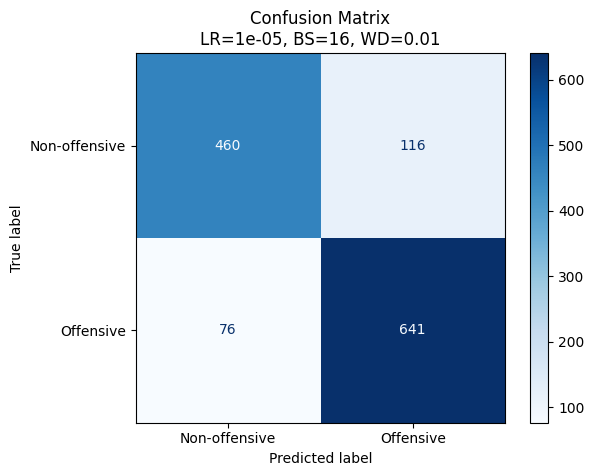


Running model with LR=1e-05, BS=16, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.409200,0.399741,0.822050,0.821489,0.821828,0.822050
2,0.289100,0.467324,0.820116,0.818847,0.820917,0.820116
3,0.202100,0.611880,0.810445,0.808363,0.812741,0.810445
4,0.147300,0.754956,0.829787,0.829787,0.829787,0.829787
5,0.130200,0.784287,0.827853,0.827026,0.828028,0.827853


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.343675
eval_accuracy              0.851508
eval_f1                    0.850852
eval_precision             0.851862
eval_recall                0.851508
eval_runtime               2.425400
eval_samples_per_second  533.098000
eval_steps_per_second     33.396000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.80      0.83       576
    Offensive       0.85      0.89      0.87       717

     accuracy                           0.85      1293
    macro avg       0.85      0.85      0.85      1293
 weighted avg       0.85      0.85      0.85      1293



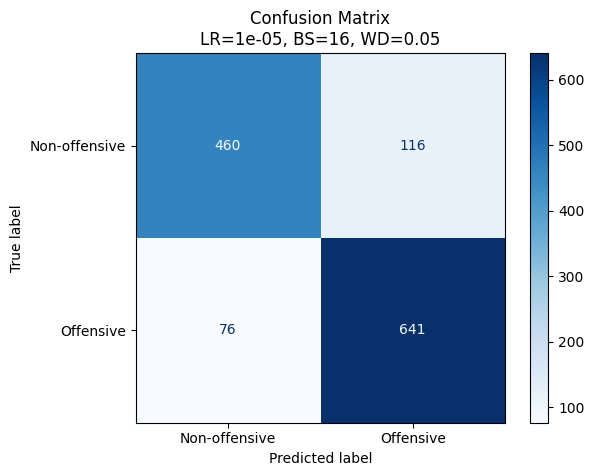


Running model with LR=1e-05, BS=32, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.425100,0.394899,0.810445,0.809032,0.811212,0.810445
2,0.312900,0.428556,0.818182,0.817371,0.818159,0.818182
3,0.239000,0.499210,0.806576,0.804633,0.808320,0.806576
4,0.183100,0.529461,0.823985,0.823374,0.823824,0.823985
5,0.165800,0.558444,0.823985,0.823139,0.824114,0.823985


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.348051
eval_accuracy              0.846094
eval_f1                    0.844881
eval_precision             0.847819
eval_recall                0.846094
eval_runtime               2.214200
eval_samples_per_second  583.947000
eval_steps_per_second     18.517000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.87      0.77      0.82       576
    Offensive       0.83      0.91      0.87       717

     accuracy                           0.85      1293
    macro avg       0.85      0.84      0.84      1293
 weighted avg       0.85      0.85      0.84      1293



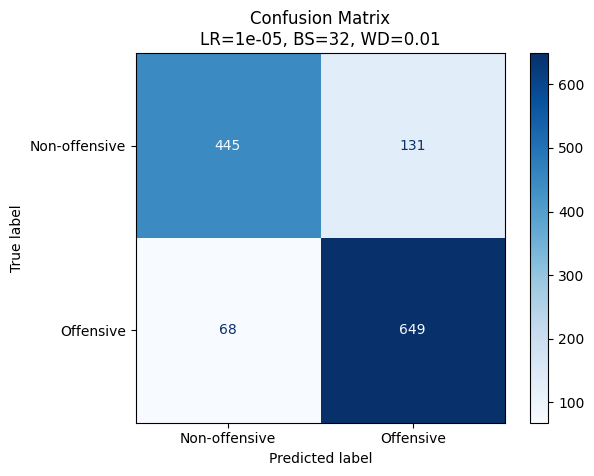


Running model with LR=1e-05, BS=32, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.424700,0.395096,0.808511,0.807310,0.808844,0.808511
2,0.312400,0.426440,0.822050,0.821132,0.822252,0.822050
3,0.238300,0.496620,0.804642,0.802767,0.806134,0.804642
4,0.182400,0.531362,0.825919,0.825259,0.825833,0.825919
5,0.163500,0.559078,0.822050,0.821132,0.822252,0.822050


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.347018
eval_accuracy              0.843774
eval_f1                    0.842669
eval_precision             0.845064
eval_recall                0.843774
eval_runtime               2.199100
eval_samples_per_second  587.963000
eval_steps_per_second     18.644000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.77      0.82       576
    Offensive       0.83      0.90      0.86       717

     accuracy                           0.84      1293
    macro avg       0.85      0.84      0.84      1293
 weighted avg       0.85      0.84      0.84      1293



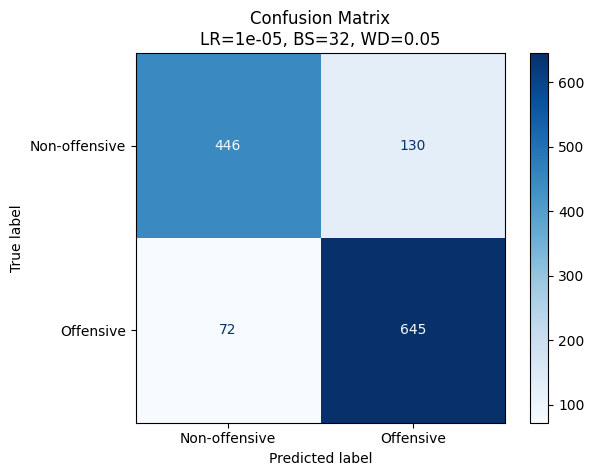


Running model with LR=2e-05, BS=16, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.404500,0.389941,0.833656,0.833417,0.833405,0.833656
2,0.241200,0.528661,0.820116,0.818390,0.822014,0.820116
3,0.135600,0.841718,0.831721,0.831523,0.831483,0.831721
4,0.067900,1.070702,0.825919,0.825991,0.826089,0.825919
5,0.046400,1.090623,0.825919,0.825370,0.825725,0.825919


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.336219
eval_accuracy              0.852282
eval_f1                    0.851943
eval_precision             0.852152
eval_recall                0.852282
eval_runtime               2.437800
eval_samples_per_second  530.386000
eval_steps_per_second     33.226000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.85      0.81      0.83       576
    Offensive       0.86      0.88      0.87       717

     accuracy                           0.85      1293
    macro avg       0.85      0.85      0.85      1293
 weighted avg       0.85      0.85      0.85      1293



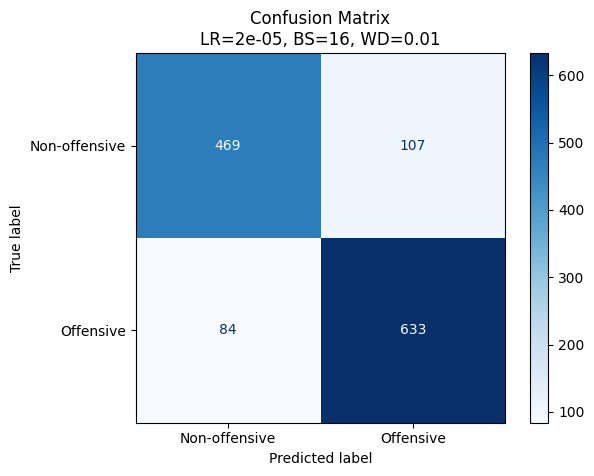


Running model with LR=2e-05, BS=16, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.405200,0.391301,0.831721,0.831435,0.831457,0.831721
2,0.241500,0.516257,0.818182,0.816675,0.819440,0.818182
3,0.137700,0.818649,0.827853,0.827735,0.827674,0.827853
4,0.069700,1.075372,0.827853,0.827735,0.827674,0.827853
5,0.043500,1.104680,0.825919,0.825575,0.825631,0.825919


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.335297
eval_accuracy              0.853828
eval_f1                    0.853354
eval_precision             0.853879
eval_recall                0.853828
eval_runtime               2.442300
eval_samples_per_second  529.418000
eval_steps_per_second     33.165000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.81      0.83       576
    Offensive       0.85      0.89      0.87       717

     accuracy                           0.85      1293
    macro avg       0.85      0.85      0.85      1293
 weighted avg       0.85      0.85      0.85      1293



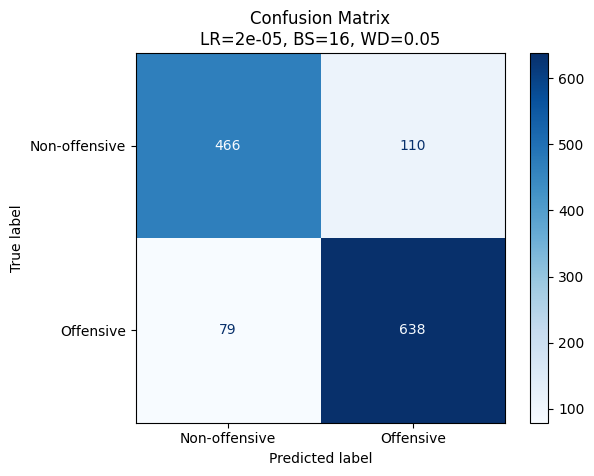


Running model with LR=2e-05, BS=32, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.414900,0.383875,0.808511,0.806842,0.809727,0.808511
2,0.266400,0.481940,0.823985,0.822451,0.825565,0.823985
3,0.151400,0.643635,0.820116,0.818225,0.822466,0.820116
4,0.098100,0.733050,0.823985,0.824217,0.824753,0.823985
5,0.059800,0.853157,0.829787,0.829451,0.829517,0.829787


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.333980
eval_accuracy              0.853055
eval_f1                    0.851872
eval_precision             0.855013
eval_recall                0.853055
eval_runtime               2.227400
eval_samples_per_second  580.509000
eval_steps_per_second     18.407000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.88      0.78      0.83       576
    Offensive       0.84      0.91      0.87       717

     accuracy                           0.85      1293
    macro avg       0.86      0.85      0.85      1293
 weighted avg       0.86      0.85      0.85      1293



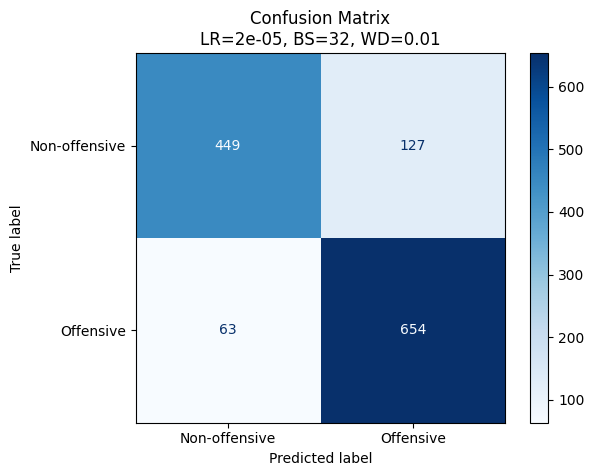


Running model with LR=2e-05, BS=32, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.415700,0.383029,0.810445,0.809032,0.811212,0.810445
2,0.267800,0.480149,0.818182,0.816675,0.819440,0.818182
3,0.151500,0.653901,0.825919,0.824760,0.826675,0.825919
4,0.099000,0.740658,0.825919,0.825991,0.826089,0.825919
5,0.062000,0.861424,0.825919,0.825669,0.825644,0.825919


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.332461
eval_accuracy              0.852282
eval_f1                    0.851068
eval_precision             0.854312
eval_recall                0.852282
eval_runtime               2.211800
eval_samples_per_second  584.579000
eval_steps_per_second     18.537000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.88      0.78      0.82       576
    Offensive       0.84      0.91      0.87       717

     accuracy                           0.85      1293
    macro avg       0.86      0.84      0.85      1293
 weighted avg       0.85      0.85      0.85      1293



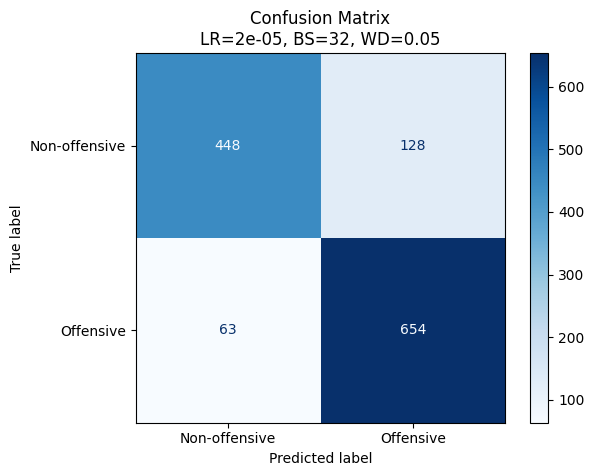


Running model with LR=3e-05, BS=16, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.410800,0.384052,0.839458,0.839096,0.839249,0.839458
2,0.224600,0.551789,0.822050,0.821132,0.822252,0.822050
3,0.102300,0.997422,0.818182,0.818451,0.819113,0.818182
4,0.045400,1.206522,0.825919,0.825575,0.825631,0.825919
5,0.013200,1.272179,0.831721,0.831435,0.831457,0.831721


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.338301
eval_accuracy              0.853828
eval_f1                    0.853241
eval_precision             0.854082
eval_recall                0.853828
eval_runtime               2.435000
eval_samples_per_second  531.004000
eval_steps_per_second     33.265000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.80      0.83       576
    Offensive       0.85      0.89      0.87       717

     accuracy                           0.85      1293
    macro avg       0.85      0.85      0.85      1293
 weighted avg       0.85      0.85      0.85      1293



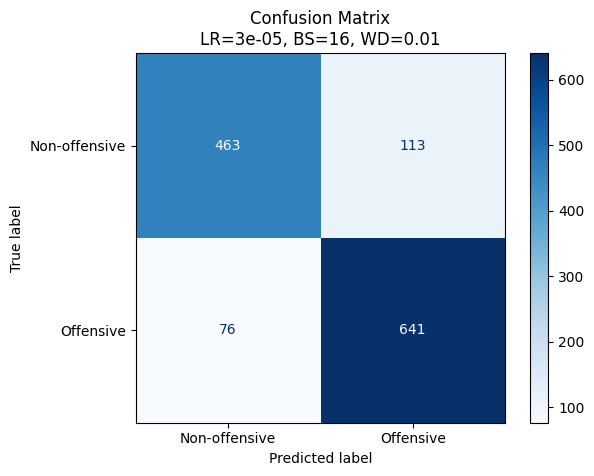


Running model with LR=3e-05, BS=16, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.412300,0.381405,0.837524,0.836908,0.837545,0.837524
2,0.227000,0.579336,0.814313,0.812929,0.815157,0.814313
3,0.107400,0.962646,0.823985,0.823777,0.823726,0.823985
4,0.049900,1.213007,0.825919,0.825475,0.825658,0.825919
5,0.017200,1.275231,0.829787,0.829353,0.829550,0.829787


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.337098
eval_accuracy              0.855375
eval_f1                    0.854677
eval_precision             0.855915
eval_recall                0.855375
eval_runtime               2.444300
eval_samples_per_second  528.977000
eval_steps_per_second     33.138000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.80      0.83       576
    Offensive       0.85      0.90      0.87       717

     accuracy                           0.86      1293
    macro avg       0.86      0.85      0.85      1293
 weighted avg       0.86      0.86      0.85      1293



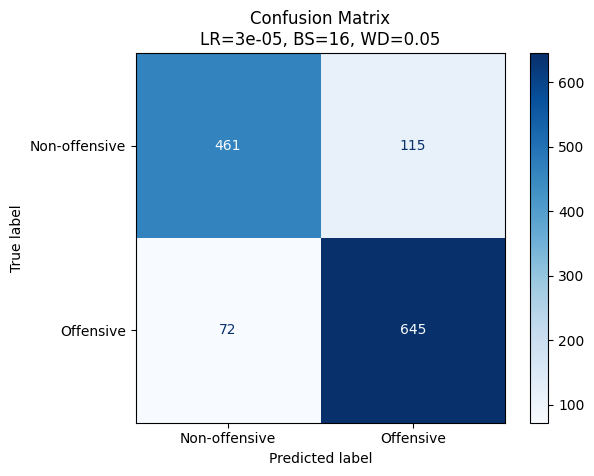


Running model with LR=3e-05, BS=32, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.414500,0.379516,0.831721,0.831435,0.831457,0.831721
2,0.246400,0.562483,0.816248,0.813382,0.821359,0.816248
3,0.118000,0.777866,0.822050,0.820576,0.823395,0.822050
4,0.066800,0.943580,0.823985,0.823864,0.823800,0.823985
5,0.027800,1.032104,0.822050,0.821257,0.822070,0.822050


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.333844
eval_accuracy              0.859242
eval_f1                    0.859113
eval_precision             0.859088
eval_recall                0.859242
eval_runtime               2.216900
eval_samples_per_second  583.241000
eval_steps_per_second     18.494000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.85      0.83      0.84       576
    Offensive       0.87      0.88      0.87       717

     accuracy                           0.86      1293
    macro avg       0.86      0.86      0.86      1293
 weighted avg       0.86      0.86      0.86      1293



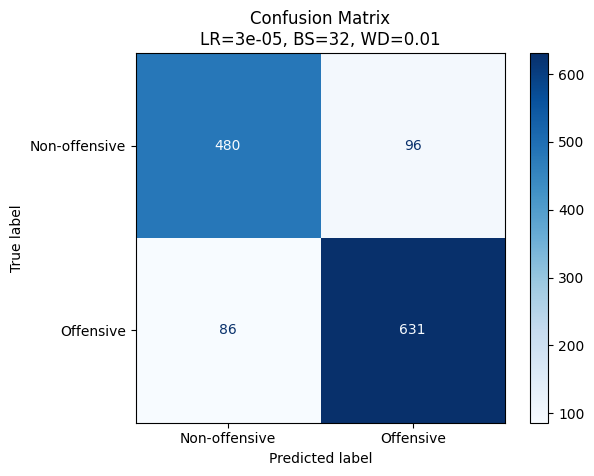


Running model with LR=3e-05, BS=32, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.411800,0.380319,0.825919,0.825919,0.825919,0.825919
2,0.245500,0.547175,0.816248,0.813582,0.820693,0.816248
3,0.111200,0.839731,0.816248,0.813962,0.819498,0.816248
4,0.059400,0.999386,0.835590,0.835396,0.835361,0.835590
5,0.028800,1.102439,0.818182,0.816826,0.819101,0.818182


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.331951
eval_accuracy              0.866976
eval_f1                    0.867041
eval_precision             0.867144
eval_recall                0.866976
eval_runtime               2.208700
eval_samples_per_second  585.409000
eval_steps_per_second     18.563000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.85      0.86      0.85       576
    Offensive       0.88      0.88      0.88       717

     accuracy                           0.87      1293
    macro avg       0.87      0.87      0.87      1293
 weighted avg       0.87      0.87      0.87      1293



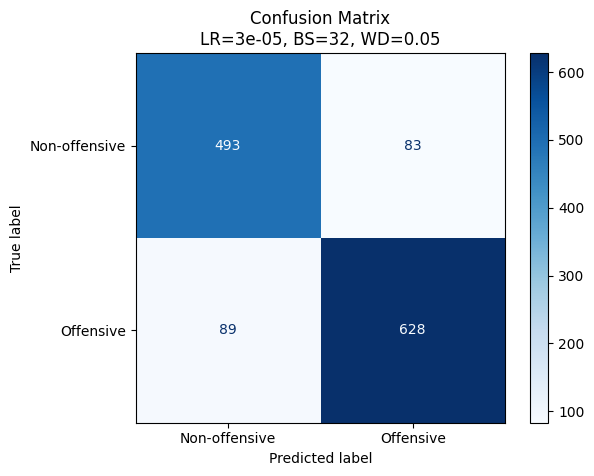


Running model with LR=4e-05, BS=16, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.419000,0.388655,0.829787,0.828518,0.830935,0.829787
2,0.221300,0.670965,0.812379,0.810903,0.813342,0.812379
3,0.105300,1.111732,0.820116,0.820543,0.822351,0.820116
4,0.040600,1.137894,0.816248,0.816122,0.816052,0.816248
5,0.014000,1.243615,0.810445,0.810070,0.810088,0.810445


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.350102
eval_accuracy              0.834493
eval_f1                    0.832691
eval_precision             0.837547
eval_recall                0.834493
eval_runtime               2.421400
eval_samples_per_second  533.985000
eval_steps_per_second     33.451000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.74      0.80       576
    Offensive       0.82      0.91      0.86       717

     accuracy                           0.83      1293
    macro avg       0.84      0.83      0.83      1293
 weighted avg       0.84      0.83      0.83      1293



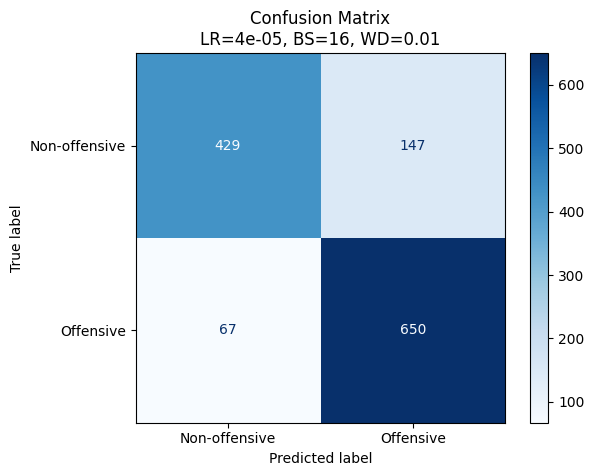


Running model with LR=4e-05, BS=16, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.419100,0.389599,0.829787,0.828518,0.830935,0.829787
2,0.221500,0.685786,0.812379,0.811056,0.813038,0.812379
3,0.104900,1.102992,0.825919,0.826176,0.826831,0.825919
4,0.039700,1.265727,0.818182,0.818392,0.818823,0.818182
5,0.014800,1.359023,0.820116,0.820154,0.820198,0.820116


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.349891
eval_accuracy              0.834493
eval_f1                    0.832691
eval_precision             0.837547
eval_recall                0.834493
eval_runtime               2.453600
eval_samples_per_second  526.991000
eval_steps_per_second     33.013000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.86      0.74      0.80       576
    Offensive       0.82      0.91      0.86       717

     accuracy                           0.83      1293
    macro avg       0.84      0.83      0.83      1293
 weighted avg       0.84      0.83      0.83      1293



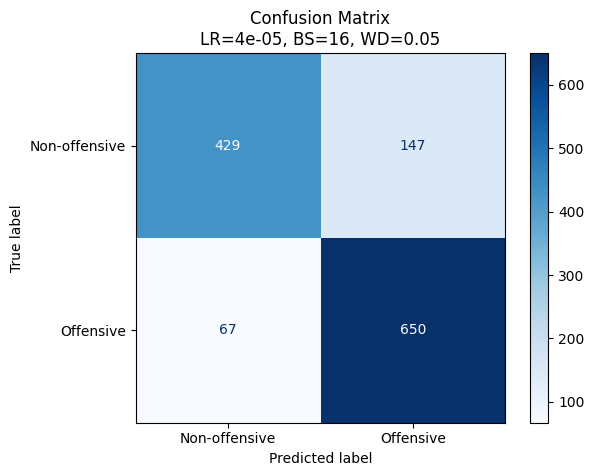


Running model with LR=4e-05, BS=32, WD=0.01


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.421300,0.390681,0.823985,0.824435,0.826667,0.823985
2,0.239400,0.579032,0.810445,0.807384,0.815630,0.810445
3,0.103200,0.711410,0.825919,0.824326,0.827751,0.825919
4,0.052100,1.016461,0.823985,0.823864,0.823800,0.823985
5,0.018000,1.085293,0.827853,0.827026,0.828028,0.827853


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.358880
eval_accuracy              0.854602
eval_f1                    0.855029
eval_precision             0.859384
eval_recall                0.854602
eval_runtime               2.190200
eval_samples_per_second  590.357000
eval_steps_per_second     18.720000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.80      0.89      0.85       576
    Offensive       0.90      0.83      0.86       717

     accuracy                           0.85      1293
    macro avg       0.85      0.86      0.85      1293
 weighted avg       0.86      0.85      0.86      1293



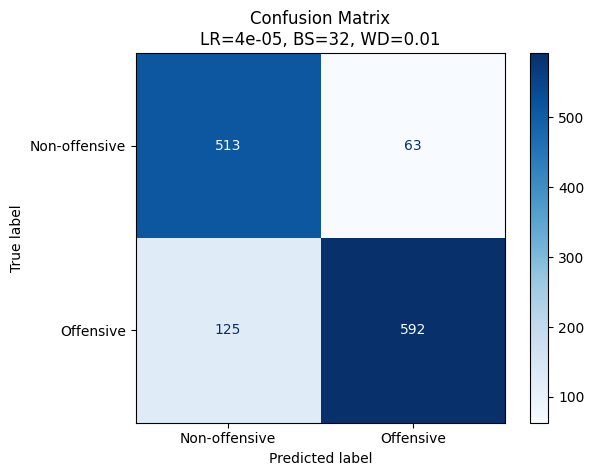


Running model with LR=4e-05, BS=32, WD=0.05


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.416300,0.388971,0.831721,0.832178,0.834881,0.831721
2,0.224800,0.602081,0.804642,0.800679,0.812183,0.804642
3,0.099300,0.864192,0.825919,0.824476,0.827349,0.825919
4,0.049200,1.003371,0.822050,0.822413,0.823662,0.822050
5,0.023900,1.095346,0.837524,0.836567,0.838182,0.837524


Evaluating on final test set...


                              Value
Metric                             
eval_loss                  0.351583
eval_accuracy              0.855375
eval_f1                    0.855802
eval_precision             0.860287
eval_recall                0.855375
eval_runtime               2.210200
eval_samples_per_second  585.008000
eval_steps_per_second     18.550000
epoch                      5.000000
               precision    recall  f1-score   support

Non-offensive       0.80      0.89      0.85       576
    Offensive       0.91      0.83      0.86       717

     accuracy                           0.86      1293
    macro avg       0.85      0.86      0.85      1293
 weighted avg       0.86      0.86      0.86      1293



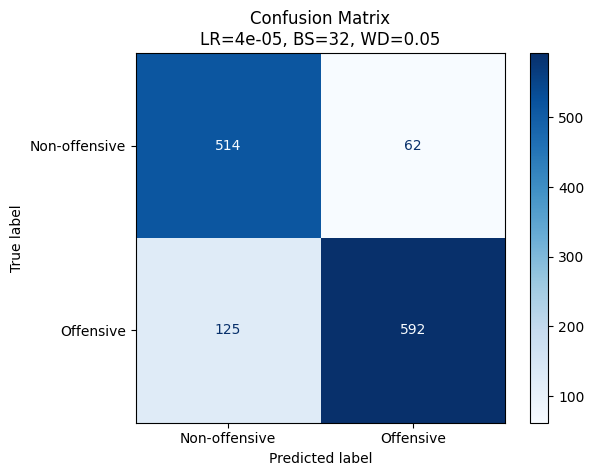

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tokenizer = RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-dec2021-offensive')

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_eval = eval_dataset.map(tokenize_function, batched=True)
tokenized_final_test = final_test_dataset.map(tokenize_function, batched=True)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

learning_rates = [1e-5, 2e-5, 3e-5, 4e-5]
batch_sizes = [16, 32]
weight_decays = [0.01, 0.05]

for lr, bs, wd in product(learning_rates, batch_sizes, weight_decays):
    print(f"\nRunning model with LR={lr}, BS={bs}, WD={wd}")

    # Instantiate a fresh model per run
    model = RobertaForSequenceClassification.from_pretrained(
        'cardiffnlp/twitter-roberta-base-dec2021-offensive', num_labels=2
    )

    training_args = TrainingArguments(
        output_dir=f"./results/lr_{lr}_bs_{bs}_wd_{wd}",
        learning_rate=lr,
        per_device_train_batch_size=bs,
        per_device_eval_batch_size=bs,
        weight_decay=wd,
        num_train_epochs=5,
        eval_strategy="epoch",
        save_strategy="epoch",
        logging_strategy="epoch",
        save_total_limit=1,
        load_best_model_at_end=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,      # Use tokenized data
        eval_dataset=tokenized_eval,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()

    print("Evaluating on final test set...")
    final_test_results = trainer.evaluate(tokenized_final_test)
    results_df = pd.DataFrame(final_test_results.items(), columns=["Metric", "Value"]).set_index("Metric")
    print(results_df)

    predictions_output = trainer.predict(tokenized_final_test)
    y_pred = np.argmax(predictions_output.predictions, axis=1)
    y_true = predictions_output.label_ids

    print(classification_report(y_true, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix\nLR={lr}, BS={bs}, WD={wd}")
    plt.show()


# Results for Hyperparameter Tuning

In [ ]:
import pandas as pd

data = {
    "Model": list(range(1, 13)),
    "LR": ["1e-5"]*4 + ["2e-5"]*4 + ["3e-5"]*4,
    "BS": [16, 16, 32, 32]*3,
    "WD": [0.01, 0.05]*6,
    "TP": [641, 641, 649, 645, 633, 638, 654, 654, 641, 645, 631, 628],
    "FP": [116, 116, 131, 130, 107, 110, 127, 128, 113, 115, 96, 83],
    "TN": [460, 460, 445, 446, 469, 466, 449, 448, 463, 461, 480, 493],
    "FN": [76, 76, 68, 72, 84, 79, 63, 63, 76, 72, 86, 89],
    "Precision": [0.85, 0.85, 0.83, 0.83, 0.86, 0.85, 0.84, 0.84, 0.85, 0.85, 0.87, 0.88],
    "Recall":    [0.89, 0.89, 0.91, 0.90, 0.88, 0.89, 0.91, 0.91, 0.89, 0.90, 0.88, 0.88],
    "F1":        [0.87, 0.87, 0.87, 0.86, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.88],
    "Accuracy":  [0.85, 0.85, 0.85, 0.84, 0.85, 0.85, 0.85, 0.85, 0.85, 0.86, 0.86, 0.87]
}

df = pd.DataFrame(data)


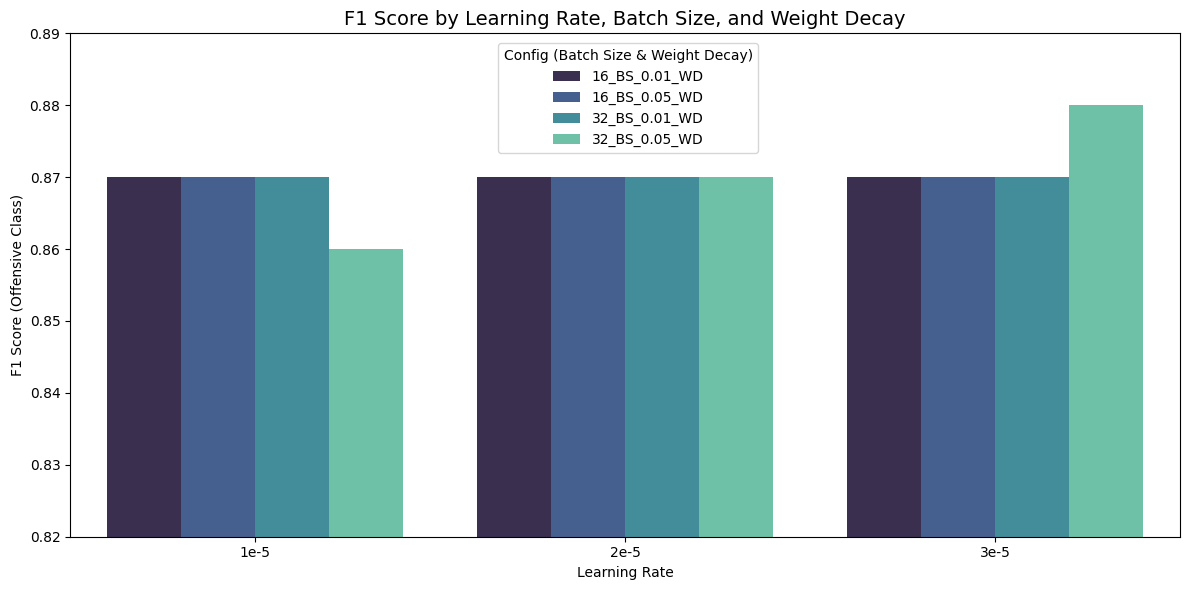

In [ ]:
# Create a new column for combination labels
df['Config'] = df['BS'].astype(str) + '_BS_' + df['WD'].astype(str) + '_WD'

# Set plot aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='LR', y='F1', hue='Config', palette='mako')
plt.title('F1 Score by Learning Rate, Batch Size, and Weight Decay', fontsize=14)
plt.ylabel('F1 Score (Offensive Class)')
plt.xlabel('Learning Rate')
plt.ylim(0.82, 0.89)

plt.legend(
    title='Config (Batch Size & Weight Decay)',
    loc='upper right',
    bbox_to_anchor=(0.62, 0.98),
    borderaxespad=0
)
plt.tight_layout()
plt.show()

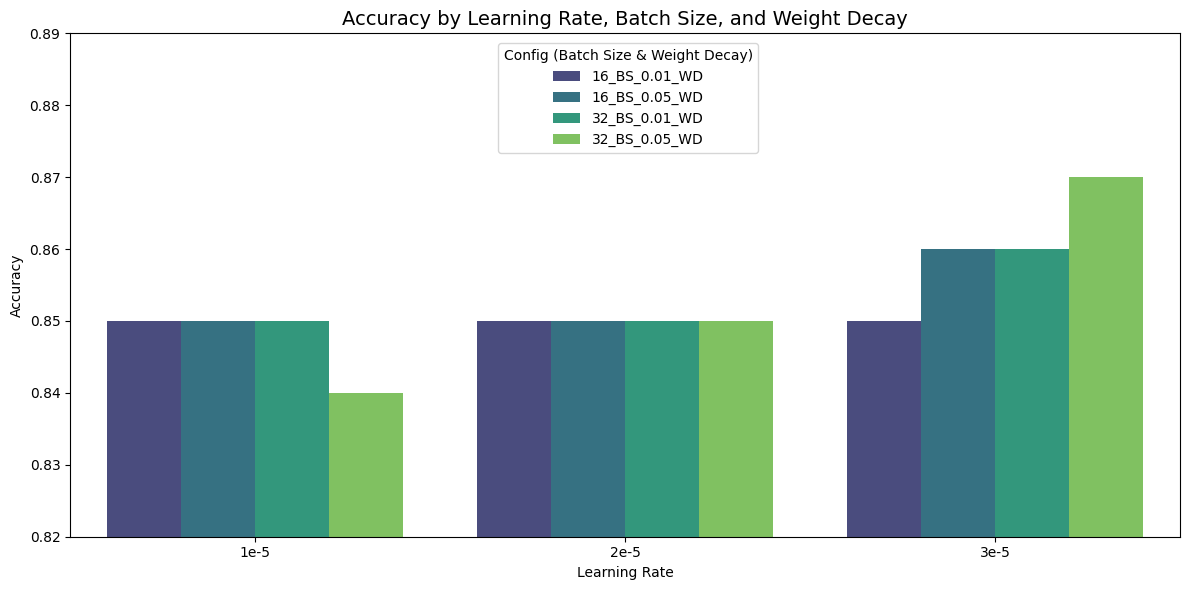

In [ ]:
# Create a new column for combination labels
df['Config'] = df['BS'].astype(str) + '_BS_' + df['WD'].astype(str) + '_WD'

# Set plot aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='LR', y='Accuracy', hue='Config', palette='viridis')
plt.title('Accuracy by Learning Rate, Batch Size, and Weight Decay', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.ylim(0.82, 0.89)
# plt.legend(title='Config (Batch Size & Weight Decay)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(
    title='Config (Batch Size & Weight Decay)',
    loc='upper right',
    bbox_to_anchor=(0.62, 0.98),
    borderaxespad=0
)
plt.tight_layout()
plt.show()

# Results:
Hyperparameter configuration with **Learning Rate = 3e-5, Batch Size = 32 and Weight Decay = 0.05** gives the best accuracy and F1 score